In [1]:
!pip install TextBlob


In [1]:
from textblob import TextBlob
import pandas as pd

**1.Import Dataset**

In [2]:
pd.set_option('display.max_colwidth',500)
data = pd.read_excel('Data_Kotor_BahasaInggris.xlsx')
data


,Unnamed: 0,text
0,0,"Indonesia is certain that the covid vaccine is safe, the side effects are minor, while the side effects are very large, it is very rare to meet, always monitor to anticipate all of this, the vaccine can protect yourself and people"
1,1,"Good afternoon, injection of the covid vaccine means that the body is immune from the potential of contracting the virus, there are several things that you can sell and covid vaccinations, let's see the following infographic"
2,2,"Good morning, Indonesia, receive a million doses of bulk raw material for the Covid Sinovac vaccine April comes this stage of the vaccine, Indonesia receives a million raw materials for the Sinovac vaccine for the bio-pharmaceutical process"
3,3,"On the same day, the Barumbung village officials sold the Covid vaccine at the Matakali Public Health Center, thank you, the Barumbung village head, even though he did not pass the selection for the Matakali Health Center"
4,4,the chairman of Mui Kapuas gave the covid vaccine to break fasting
...,...,...
3432,3432,investigation of the astrazeneca vaccine hook calls salable
3433,3433,The East Jakarta City Government is still like an injection of vaccines for the old people of Ramadan
3434,3434,Disdukcapil employees turn to really enjoy the injection of the covid vaccine
3435,3435,vaccination to break the covid distribution chain


**2. Preproces (Remove charackter)**

In [3]:
!pip install regex
!pip install emoji
!pip install nltk

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\win
[nltk_data]     8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import re
import nltk
import emoji
import pandas as pd

def preproses(tweets) :
    tweets = tweets.encode('ascii','ignore').decode('utf-8')
    tweets = re.sub(r'[^\x00-\x7f]',r'',tweets)
    tweets = re.sub(r'[_(){}[]]+','',tweets)
    tweets = re.sub(r'@[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'#[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'_[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'-[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r':[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'https?:\/\/\S+','',tweets)
    tweets = re.sub(r'\d+','',tweets)
    tweets = re.sub(r'@+','',tweets)
    tweets = re.sub(r':+','',tweets)
    tweets = re.sub(r'_+','',tweets)
    tweets = tweets.lower()
    allemot = [str for str in tweets]
    listemot = [x for x in allemot if x in emoji.UNICODE_EMOJI]
    tweets = ' '.join([str for str in tweets.split()if not any (y in str for str in listemot)])
    return tweets
data['text']= data['text'].apply(preproses)
dataset = pd.DataFrame(data['text'])
dataset

,text
0,"indonesia is certain that the covid vaccine is safe, the side effects are minor, while the side effects are very large, it is very rare to meet, always monitor to anticipate all of this, the vaccine can protect yourself and people"
1,"good afternoon, injection of the covid vaccine means that the body is immune from the potential of contracting the virus, there are several things that you can sell and covid vaccinations, let's see the following infographic"
2,"good morning, indonesia, receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine, indonesia receives a million raw materials for the sinovac vaccine for the bio process"
3,"on the same day, the barumbung village officials sold the covid vaccine at the matakali public health center, thank you, the barumbung village head, even though he did not pass the selection for the matakali health center"
4,the chairman of mui kapuas gave the covid vaccine to break fasting
...,...
3432,investigation of the astrazeneca vaccine hook calls salable
3433,the east jakarta city government is still like an injection of vaccines for the old people of ramadan
3434,disdukcapil employees turn to really enjoy the injection of the covid vaccine
3435,vaccination to break the covid distribution chain


**3. Labeling the sentiment**

In [4]:
from textblob import TextBlob

In [5]:
dataset['polarity'] = dataset['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
dataset['subjectivity'] = dataset['text'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
dataset

,text,polarity,subjectivity
0,"indonesia is certain that the covid vaccine is safe, the side effects are minor, while the side effects are very large, it is very rare to meet, always monitor to anticipate all of this, the vaccine can protect yourself and people",0.266571,0.565714
1,"good afternoon, injection of the covid vaccine means that the body is immune from the potential of contracting the virus, there are several things that you can sell and covid vaccinations, let's see the following infographic",0.175000,0.425000
2,"good morning, indonesia, receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine, indonesia receives a million raw materials for the sinovac vaccine for the bio process",0.079487,0.507692
3,"on the same day, the barumbung village officials sold the covid vaccine at the matakali public health center, thank you, the barumbung village head, even though he did not pass the selection for the matakali health center",-0.050000,0.097917
4,the chairman of mui kapuas gave the covid vaccine to break fasting,0.000000,0.000000
...,...,...,...
3432,investigation of the astrazeneca vaccine hook calls salable,0.000000,0.000000
3433,the east jakarta city government is still like an injection of vaccines for the old people of ramadan,0.100000,0.200000
3434,disdukcapil employees turn to really enjoy the injection of the covid vaccine,0.400000,0.500000
3435,vaccination to break the covid distribution chain,0.000000,0.000000


In [6]:
dataset.loc[dataset['subjectivity']>= 0.5, 'Jenis'] = "Opini"
dataset.loc[dataset['subjectivity']<=0.5, 'Jenis'] = "Fakta"
datasentiment = pd.DataFrame(dataset['Jenis'])
hasil_positif = datasentiment [datasentiment ['Jenis'] =="Opini"]
hasil_netral = datasentiment [datasentiment ['Jenis'] =="Fakta"]
hasil_positif = len (hasil_positif)
hasil_netral = len (hasil_netral)
df = pd.DataFrame({"Jenis": ['Opinion','Fact'],"Total Jenis": [hasil_positif,hasil_netral]})
df

,Jenis,Total Jenis
0,Opinion,844
1,Fact,2593


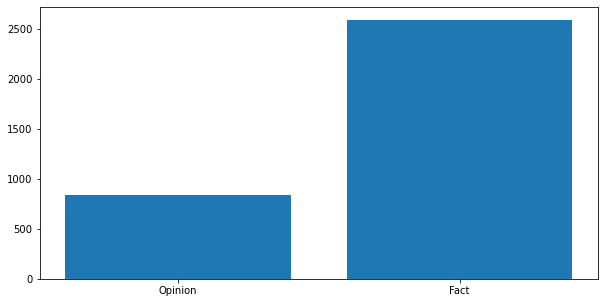

In [7]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
Nilai = df['Jenis']
Persentase = df['Total Jenis']
plt.bar(Nilai, Persentase)
plt.show()

In [7]:
dataset.drop(dataset.loc[dataset['subjectivity']<=0.5].index, inplace=True)
dataset.drop(dataset.loc[dataset['polarity']==0.0].index, inplace=True)
dataset

,text,polarity,subjectivity,Jenis
0,"indonesia is certain that the covid vaccine is safe, the side effects are minor, while the side effects are very large, it is very rare to meet, always monitor to anticipate all of this, the vaccine can protect yourself and people",0.266571,0.565714,Opini
2,"good morning, indonesia, receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine, indonesia receives a million raw materials for the sinovac vaccine for the bio process",0.079487,0.507692,Opini
10,men who inject the covid vaccine are different from being safe,0.250000,0.550000,Opini
27,the countries that came out of the world's largest covid vaccine are now lacking in their own place,0.600000,1.000000,Opini
46,eijkman covid vaccine effective oak variant,0.600000,0.800000,Opini
...,...,...,...,...
3399,"the moment for the morning news, w dian savitri duterte, is willing to give the citizens a share for the covid vaccine",0.250000,0.750000,Opini
3414,"in discussing the issue of health, the two leaders exchanged thoughts on the hands of covid, both countries conveyed that they were worried that the nationalism of vaccines was very disturbing to the availability of world vaccines n interfering with access to vaccines",-0.650000,1.000000,Opini
3417,"many thousand people muaraenim, sinovac vaccine, target of thousands of people in muaraenim district, so the target of the covid vaccine is far away, only thousands of people",0.200000,0.833333,Opini
3419,"alhamdulillah, my day at the covid vaccine was easy, always healthy",0.466667,0.666667,Opini


In [8]:
dataset.loc[dataset['polarity']> 0.0, 'sentiment'] = "Positif"
dataset.loc[dataset['polarity']< 0.0, 'sentiment'] = "Negatif"
datasentiment = pd.DataFrame(dataset['sentiment'])
datasentiment

,sentiment
0,Positif
2,Positif
10,Positif
27,Positif
46,Positif
...,...
3399,Positif
3414,Negatif
3417,Positif
3419,Positif


In [9]:
databaru = datasentiment.combine_first(dataset)
#dataset.to_excel('Hasil_textbloblabel.xlsx')
databaru 

,Jenis,polarity,sentiment,subjectivity,text
0,Opini,0.266571,Positif,0.565714,"indonesia is certain that the covid vaccine is safe, the side effects are minor, while the side effects are very large, it is very rare to meet, always monitor to anticipate all of this, the vaccine can protect yourself and people"
2,Opini,0.079487,Positif,0.507692,"good morning, indonesia, receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine, indonesia receives a million raw materials for the sinovac vaccine for the bio process"
10,Opini,0.250000,Positif,0.550000,men who inject the covid vaccine are different from being safe
27,Opini,0.600000,Positif,1.000000,the countries that came out of the world's largest covid vaccine are now lacking in their own place
46,Opini,0.600000,Positif,0.800000,eijkman covid vaccine effective oak variant
...,...,...,...,...,...
3399,Opini,0.250000,Positif,0.750000,"the moment for the morning news, w dian savitri duterte, is willing to give the citizens a share for the covid vaccine"
3414,Opini,-0.650000,Negatif,1.000000,"in discussing the issue of health, the two leaders exchanged thoughts on the hands of covid, both countries conveyed that they were worried that the nationalism of vaccines was very disturbing to the availability of world vaccines n interfering with access to vaccines"
3417,Opini,0.200000,Positif,0.833333,"many thousand people muaraenim, sinovac vaccine, target of thousands of people in muaraenim district, so the target of the covid vaccine is far away, only thousands of people"
3419,Opini,0.466667,Positif,0.666667,"alhamdulillah, my day at the covid vaccine was easy, always healthy"


In [11]:
hasil_positif = databaru[databaru['sentiment'] =="Positif"]
hasil_negatif = databaru[databaru['sentiment'] =="Negatif"]
hasil_positif = len (hasil_positif)
hasil_negatif = len (hasil_negatif)
per_hasil_positif = (hasil_positif/(hasil_positif+hasil_negatif))*100
per_hasil_negatif = (hasil_negatif/(hasil_positif+hasil_negatif))*100
df = pd.DataFrame({"Nilai": ['Positive','Negative'],"Total Sentiment": [hasil_positif,hasil_negatif],"Persentase": [per_hasil_positif,per_hasil_negatif]})
df


,Nilai,Total Sentiment,Persentase
0,Positive,623,77.972466
1,Negative,176,22.027534


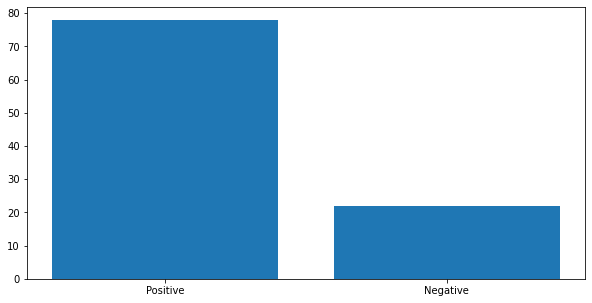

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
Nilai = df['Nilai']
Persentase = df['Persentase']
plt.bar(Nilai, Persentase)
plt.show()

**4. Full Text Preprocessing in English**

In [10]:
datakata=pd.DataFrame(databaru['text'])
datakata

,text
0,"indonesia is certain that the covid vaccine is safe, the side effects are minor, while the side effects are very large, it is very rare to meet, always monitor to anticipate all of this, the vaccine can protect yourself and people"
2,"good morning, indonesia, receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine, indonesia receives a million raw materials for the sinovac vaccine for the bio process"
10,men who inject the covid vaccine are different from being safe
27,the countries that came out of the world's largest covid vaccine are now lacking in their own place
46,eijkman covid vaccine effective oak variant
...,...
3399,"the moment for the morning news, w dian savitri duterte, is willing to give the citizens a share for the covid vaccine"
3414,"in discussing the issue of health, the two leaders exchanged thoughts on the hands of covid, both countries conveyed that they were worried that the nationalism of vaccines was very disturbing to the availability of world vaccines n interfering with access to vaccines"
3417,"many thousand people muaraenim, sinovac vaccine, target of thousands of people in muaraenim district, so the target of the covid vaccine is far away, only thousands of people"
3419,"alhamdulillah, my day at the covid vaccine was easy, always healthy"


In [11]:
import re
import nltk
import emoji
import pandas as pd
def preproses(tweets) :
    tweets = tweets.encode('ascii','ignore').decode('utf-8')
    tweets = re.sub(r'[^\x00-\x7f]',r'',tweets)
    tweets = re.sub(r'[_(){}[]]+','',tweets)
    tweets = re.sub(r'@[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'#[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'_[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'-[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r':[A-Za-z0-9]+','',tweets)
    tweets = re.sub(r'https?:\/\/\S+','',tweets)
    tweets = re.sub(r'\d+','',tweets)
    tweets = re.sub(r'@+','',tweets)
    tweets = re.sub(r':+','',tweets)
    tweets = re.sub(r',+','',tweets)
    tweets = re.sub(r'_+','',tweets)
    tweets = tweets.lower()
    allemot = [str for str in tweets]
    listemot = [x for x in allemot if x in emoji.UNICODE_EMOJI]
    tweets = ' '.join([str for str in tweets.split()if not any (y in str for str in listemot)])
    return tweets
datakata['text']= datakata['text'].apply(preproses)
dataset = pd.DataFrame(datakata['text'])
dataset


,text
0,indonesia is certain that the covid vaccine is safe the side effects are minor while the side effects are very large it is very rare to meet always monitor to anticipate all of this the vaccine can protect yourself and people
2,good morning indonesia receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine indonesia receives a million raw materials for the sinovac vaccine for the bio process
10,men who inject the covid vaccine are different from being safe
27,the countries that came out of the world's largest covid vaccine are now lacking in their own place
46,eijkman covid vaccine effective oak variant
...,...
3399,the moment for the morning news w dian savitri duterte is willing to give the citizens a share for the covid vaccine
3414,in discussing the issue of health the two leaders exchanged thoughts on the hands of covid both countries conveyed that they were worried that the nationalism of vaccines was very disturbing to the availability of world vaccines n interfering with access to vaccines
3417,many thousand people muaraenim sinovac vaccine target of thousands of people in muaraenim district so the target of the covid vaccine is far away only thousands of people
3419,alhamdulillah my day at the covid vaccine was easy always healthy


In [16]:
!pip install nltk

from nltk.stem import PorterStemmer

In [12]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
text_stemmed = []
for index, row in dataset.iterrows():
    text_stemmed.append(stemmer.stem(row['text']))

dataset ['text'] = text_stemmed
dataset

,text
0,indonesia is certain that the covid vaccine is safe the side effects are minor while the side effects are very large it is very rare to meet always monitor to anticipate all of this the vaccine can protect yourself and peopl
2,good morning indonesia receive a million doses of bulk raw material for the covid sinovac vaccine april comes this stage of the vaccine indonesia receives a million raw materials for the sinovac vaccine for the bio process
10,men who inject the covid vaccine are different from being saf
27,the countries that came out of the world's largest covid vaccine are now lacking in their own plac
46,eijkman covid vaccine effective oak vari
...,...
3399,the moment for the morning news w dian savitri duterte is willing to give the citizens a share for the covid vaccin
3414,in discussing the issue of health the two leaders exchanged thoughts on the hands of covid both countries conveyed that they were worried that the nationalism of vaccines was very disturbing to the availability of world vaccines n interfering with access to vaccin
3417,many thousand people muaraenim sinovac vaccine target of thousands of people in muaraenim district so the target of the covid vaccine is far away only thousands of peopl
3419,alhamdulillah my day at the covid vaccine was easy always healthi


In [13]:
import nltk
from nltk.corpus import stopwords
mystoplist = open("mystop.txt", "r").read()

mystoplist_result = []
for index,row in dataset.iterrows():
    word_token = nltk.word_tokenize(row ['text'])
    word_token = [word for word in word_token if not word in mystoplist]
    mystoplist_result.append(" ".join(word_token))

dataset =pd.DataFrame({"text": mystoplist_result})
dataset


,text
0,indonesia certain covid vaccine safe side effects minor side effects large rare meet always monitor anticipate vaccine protect peopl
1,good morning indonesia receive million doses bulk raw material covid sinovac vaccine april comes stage vaccine indonesia receives million raw materials sinovac vaccine bio process
2,men inject covid vaccine different saf
3,countries came world largest covid vaccine lacking plac
4,eijkman covid vaccine effective oak vari
...,...
794,moment morning news dian savitri duterte willing give citizens share covid vaccin
795,discussing issue health two leaders exchanged thoughts hands covid countries conveyed worried nationalism vaccines disturbing availability world vaccines interfering access vaccin
796,many thousand people muaraenim sinovac vaccine target thousands people muaraenim district target covid vaccine far away thousands peopl
797,alhamdulillah day covid vaccine easy always healthi


**5. Step of TF-IDF**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()

X = counter.fit_transform(dataset['text'])
df_words = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
df_words

,aamiin,able,abroad,academics,academies,acc,accelerating,acceleration,accept,access,...,york,yoshihide,young,younger,youth,youtube,zafuan,zarco,zenneca,zulkifly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
795,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
count = pd.DataFrame(df_words.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf.rename(columns={  0:'Name'}, inplace=True)
countdf

,Name
covid,808
vaccine,667
vaccines,185
vaccin,131
vaccination,110
people,101
health,70
injection,64
safe,63
get,63


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfTransformer()

Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf

,aamiin,able,abroad,academics,academies,acc,accelerating,acceleration,accept,access,...,york,yoshihide,young,younger,youth,youtube,zafuan,zarco,zenneca,zulkifly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
databaru.loc[databaru['polarity']>= 0.0, 'sentiment'] = "1"
databaru.loc[databaru['polarity']< 0.0, 'sentiment'] = "-1"
datasentiment = pd.DataFrame(databaru['sentiment'])
datasentiment

,sentiment
0,1
2,1
10,1
27,1
46,1
...,...
3399,1
3414,-1
3417,1
3419,1


**6. Classification Algorithm Peformance**

In [20]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [27]:
model_1 = DecisionTreeClassifier()
model_2 = KNeighborsClassifier()
model_3 = MLPClassifier()
model_4 = GaussianNB()
model_5 = SVC()

In [21]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(df_tfidf,datasentiment)

10

In [29]:
score_list_model1,score_list_model2,score_list_model3,score_list_model4,score_list_model5 = [],[],[],[],[]

In [28]:
from sklearn.metrics import f1_score
import numpy as np
X= df_tfidf
y = datasentiment
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    model_3.fit(X_train, y_train)
    model_4.fit(X_train, y_train)
    model_5.fit(X_train, y_train)
    y_pred1=model_1.predict(X_test)
    y_pred2=model_2.predict(X_test)
    y_pred3=model_3.predict(X_test)
    y_pred4=model_4.predict(X_test)
    y_pred5=model_5.predict(X_test)
    score_list_model1.append(f1_score(y_test,y_pred1,average='weighted',labels=np.unique(y_pred1)))
    score_list_model2.append(f1_score(y_test,y_pred2,average='weighted',labels=np.unique(y_pred2)))
    score_list_model3.append(f1_score(y_test,y_pred3,average='weighted',labels=np.unique(y_pred3)))
    score_list_model4.append(f1_score(y_test,y_pred4,average='weighted',labels=np.unique(y_pred4)))
    score_list_model5.append(f1_score(y_test,y_pred5,average='weighted',labels=np.unique(y_pred5)))


<ipython-input-28-d289877ba3e5>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_2.fit(X_train, y_train)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-28-d28

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-28-d289877ba3e5>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_2.fit(X_train, y_train)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\win 8\anacon

In [29]:
score_table = pd.DataFrame({"Jumlah K-Fold": ['1','2','3','4','5','6','7','8','9','10'],"F1 Score model 1" :score_list_model1,"F1 Score model 2" :score_list_model2,"F1 Score model 3" :score_list_model3,"F1 Score model 4" :score_list_model4,"F1 Score model 5" :score_list_model5})
score_table

,Jumlah K-Fold,F1 Score model 1,F1 Score model 2,F1 Score model 3,F1 Score model 4,F1 Score model 5
0,1,0.820712,0.747101,0.794975,0.756006,0.772500
1,2,0.763462,0.759837,0.753770,0.727851,0.714922
2,3,0.814429,0.727667,0.864448,0.718555,0.722379
3,4,0.866084,0.789508,0.872316,0.821242,0.731429
4,5,0.805303,0.778195,0.778889,0.750000,0.705244
5,6,0.811538,0.794880,0.767531,0.740182,0.746509
6,7,0.775000,0.758824,0.778889,0.730769,0.705244
7,8,0.827544,0.826751,0.869141,0.790625,0.705244
8,9,0.817387,0.822230,0.822230,0.764453,0.755653
9,10,0.803182,0.800891,0.800891,0.752998,0.813376


In [30]:
final_1=np.mean(score_list_model1)
final_2=np.mean(score_list_model2)
final_3=np.mean(score_list_model3)
final_4=np.mean(score_list_model4)
final_5=np.mean(score_list_model5)
df = pd.DataFrame({"Algoritma": ['Decision Tree','K-Nearest Neighbor','Artificial Neural Network','Naive Bayes','Support Vector Machine'],"F1-SCORE": [final_1,final_2,final_3,final_4,final_5]})
df


,Algoritma,F1-SCORE
0,Decision Tree,0.810464
1,K-Nearest Neighbor,0.780588
2,Artificial Neural Network,0.810308
3,Naive Bayes,0.755268
4,Support Vector Machine,0.737250


**Visualization of Number K-fold Validation**

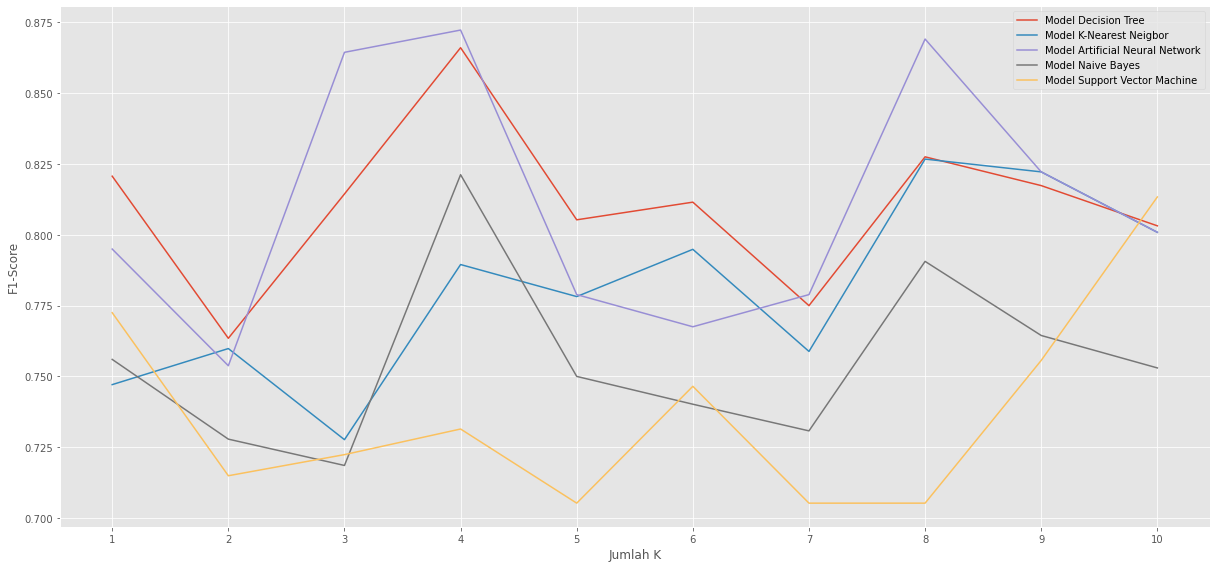

In [31]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 17, 8
plt.style.use('ggplot')
fig, (ax2) = plt.subplots(nrows=1, ncols=1)
ax2.plot(score_table['Jumlah K-Fold'], score_table['F1 Score model 1'], label='Model Decision Tree')
ax2.plot(score_table['Jumlah K-Fold'], score_table['F1 Score model 2'], label='Model K-Nearest Neigbor')
ax2.plot(score_table['Jumlah K-Fold'], score_table['F1 Score model 3'], label='Model Artificial Neural Network')
ax2.plot(score_table['Jumlah K-Fold'], score_table['F1 Score model 4'], label='Model Naive Bayes')
ax2.plot(score_table['Jumlah K-Fold'], score_table['F1 Score model 5'], label='Model Support Vector Machine')
ax2.set_ylabel('F1-Score')
ax2.set_xlabel('Jumlah K')
ax2.legend()
plt.tight_layout()
plt.show()

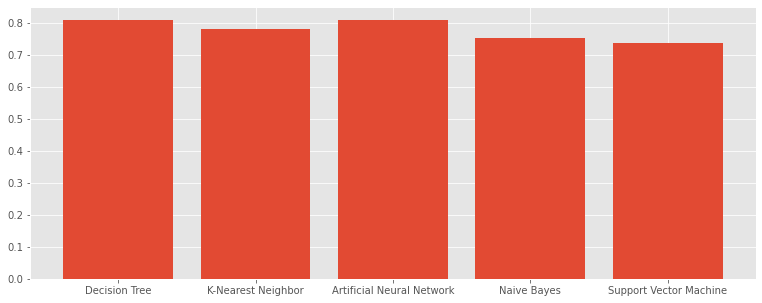

In [32]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13, 5
Nilai = df['Algoritma']
Persentase = df['F1-SCORE']
plt.bar(Nilai, Persentase)
plt.show()


**7. Process Optimitation Parameter**

In [78]:
!pip install pactools

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\win 8\anaconda3\lib\threading.py:874: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\win 8\anaconda3\lib\threading.py:874: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
C:\Users\win 8\anaconda3\lib\threading.py:874: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  del self._target, self._args, self._kwargs


**Algoritma Decision Tree**

In [22]:
#IMPORT Algoritma
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
#TUNING PARAMETER
parameter_space = {'criterion': ['gini','entropy'],
                   'max_depth': [2, 3, 5, 10, 20],
                   'min_samples_leaf': [5, 10, 20, 50, 100]
    }

#IMPLENTASI OPTIMASI PARAMETER
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from pactools import simulate_pac
from pactools.grid_search import ExtractDriver, AddDriverDelay
from pactools.grid_search import DARSklearn, MultipleArray
from pactools.grid_search import GridSearchCVProgressBar

score = make_scorer(f1_score, greater_is_better=True,average='weighted')
clf = GridSearchCVProgressBar(dt, parameter_space, n_jobs=-1, cv=10,scoring = score)
clf.fit(df_tfidf,datasentiment)
print(clf.best_params_)
print(clf.best_score_)


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
0.7829411272629674


C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


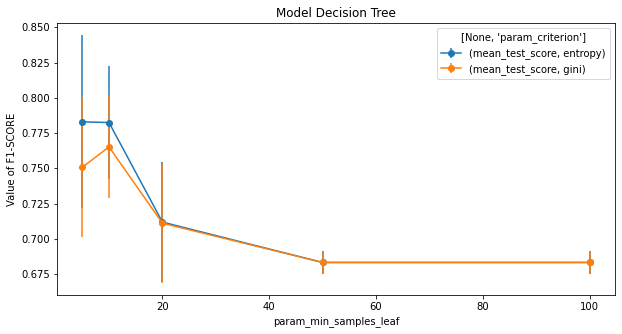

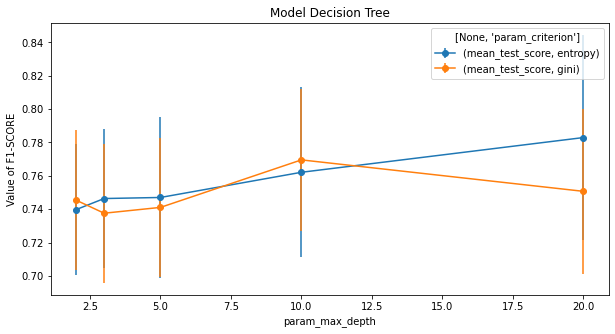

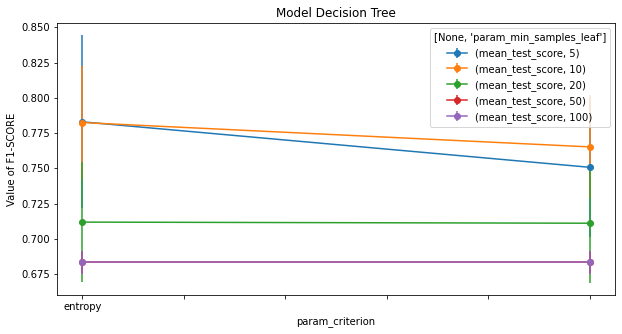

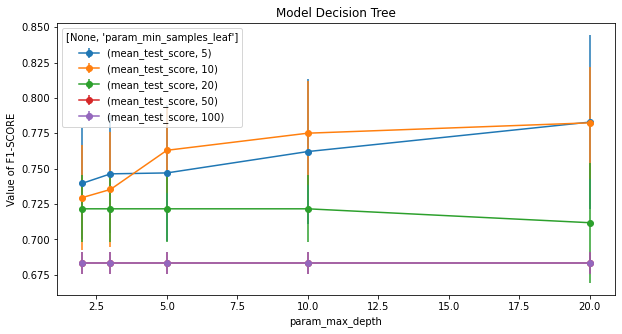

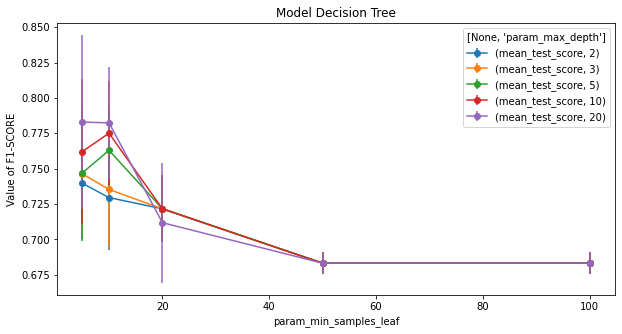

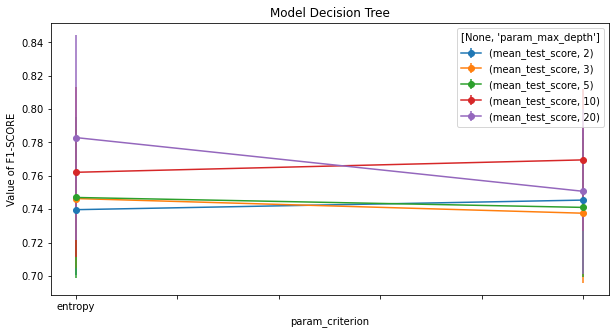

In [23]:

#PLOTING OPTIMASI PARAMETER
#1
def plot_results(index='', columns='criterion'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Decision Tree')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()

plot_results(index='min_samples_leaf') 
plot_results(index='max_depth')
#2
def plot_results(index='', columns='min_samples_leaf'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Decision Tree')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='criterion') 
plot_results(index='max_depth')
#3
def plot_results(index='', columns='max_depth'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Decision Tree')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='min_samples_leaf') 
plot_results(index='criterion')


C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


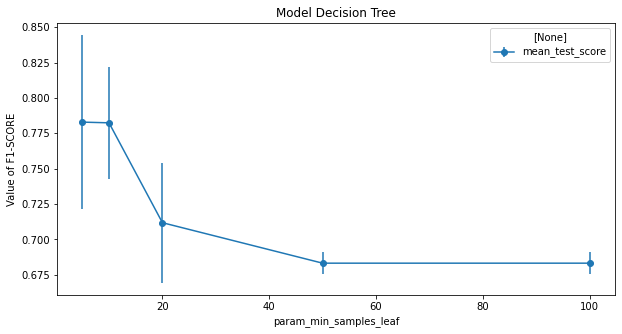

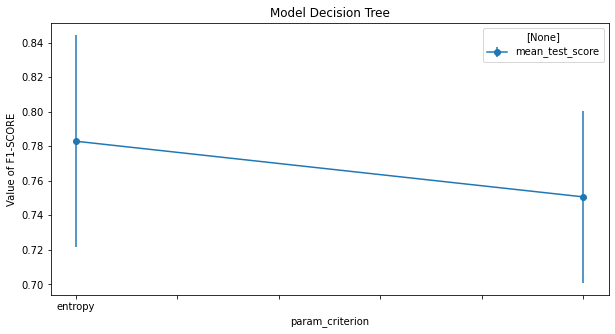

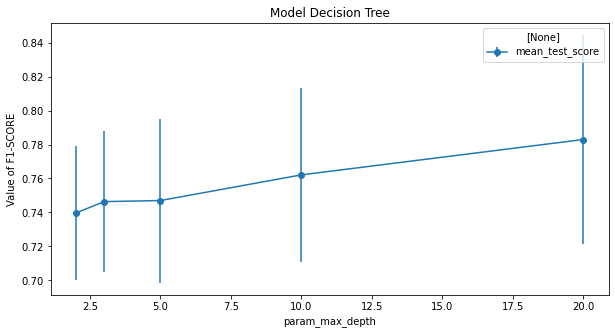

In [24]:
#1
def plot_results(index='', columns=''):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Decision Tree')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='min_samples_leaf') 
plot_results(index='criterion')
plot_results(index='max_depth')

In [26]:
df = pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score']]
df.sort_values('rank_test_score', ascending = True)

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_test_score,std_test_score,params,rank_test_score
45,0.782941,0.061265,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}",1
46,0.782443,0.039778,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10}",2
41,0.775116,0.036545,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}",3
11,0.772570,0.038607,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}",4
15,0.769565,0.042435,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}",5
16,0.767628,0.040559,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}",6
21,0.765180,0.036572,"{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}",7
36,0.763021,0.030308,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}",8
40,0.762129,0.051030,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}",9
20,0.750718,0.049615,"{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}",10


**Algoritma K-Nearest Neighbor**

In [58]:
#IMPORT Algoritma
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#TUNING PARAMETER
k_range = list(range(1, 21))
parameter_space = dict(n_neighbors=k_range)

#IMPLENTASI OPTIMASI PARAMETER
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from pactools import simulate_pac
from pactools.grid_search import ExtractDriver, AddDriverDelay
from pactools.grid_search import DARSklearn, MultipleArray
from pactools.grid_search import GridSearchCVProgressBar

score = make_scorer(f1_score, greater_is_better=True,average='weighted')
clf = GridSearchCVProgressBar(knn, parameter_space, n_jobs=-1, cv=10,scoring = score)
clf.fit(df_tfidf,datasentiment)
print(clf.best_params_)
print(clf.best_score_)

df = pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score']]
df.sort_values('rank_test_score', ascending = True)

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_neighbors': 3}
0.7727654014121458


,mean_test_score,std_test_score,params,rank_test_score
2,0.772765,0.036500,{'n_neighbors': 3},1
4,0.769272,0.042563,{'n_neighbors': 5},2
6,0.765770,0.029222,{'n_neighbors': 7},3
0,0.762407,0.051067,{'n_neighbors': 1},4
7,0.761496,0.029109,{'n_neighbors': 8},5
5,0.760293,0.036562,{'n_neighbors': 6},6
9,0.756002,0.021456,{'n_neighbors': 10},7
8,0.752438,0.024290,{'n_neighbors': 9},8
3,0.752393,0.037915,{'n_neighbors': 4},9
11,0.748791,0.019798,{'n_neighbors': 12},10


Text(0, 0.5, 'Value F1-Score')

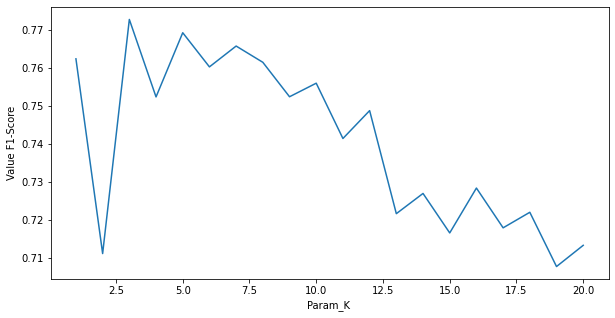

In [60]:
plt.plot(k_range, df['mean_test_score'])
plt.xlabel('Param_K ')
plt.ylabel('Value F1-Score')

**Algoritma Artificial Neural Network**

In [18]:
#Build Tuning Parameter Algorithm
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [10, 20, 40, 50],
    'alpha': [0.01, 0.1, 0.5, 1],
    'momentum' : [0.2, 0.4, 0.8, 1]
    }

#optimasi parameter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from pactools import simulate_pac
from pactools.grid_search import ExtractDriver, AddDriverDelay
from pactools.grid_search import DARSklearn, MultipleArray
from pactools.grid_search import GridSearchCVProgressBar

score = make_scorer(f1_score, greater_is_better=True,average='weighted')
clf = GridSearchCVProgressBar(mlp, parameter_space, n_jobs=-1, cv=10,scoring = score)
clf.fit(df_tfidf,datasentiment)
print(clf.best_params_)
print(clf.best_score_)



C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'alpha': 0.01, 'hidden_layer_sizes': 50, 'momentum': 0.2}
0.8004488290928394


C:\Users\win 8\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


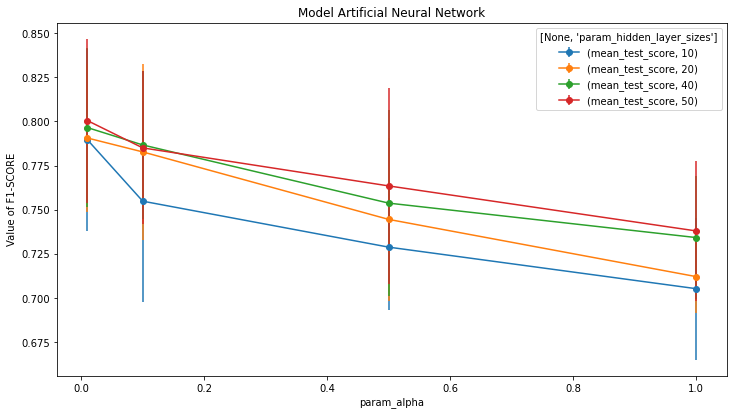

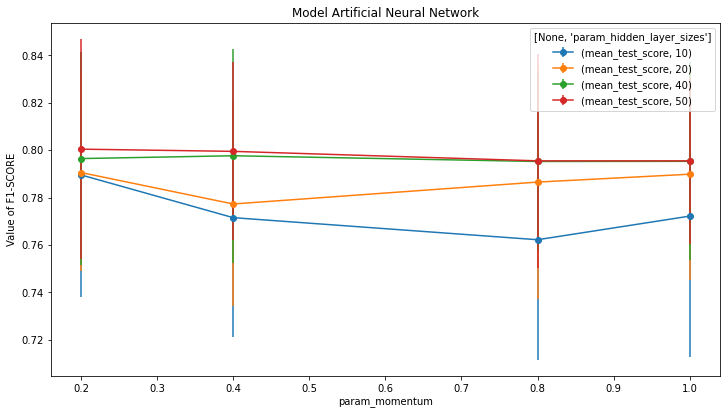

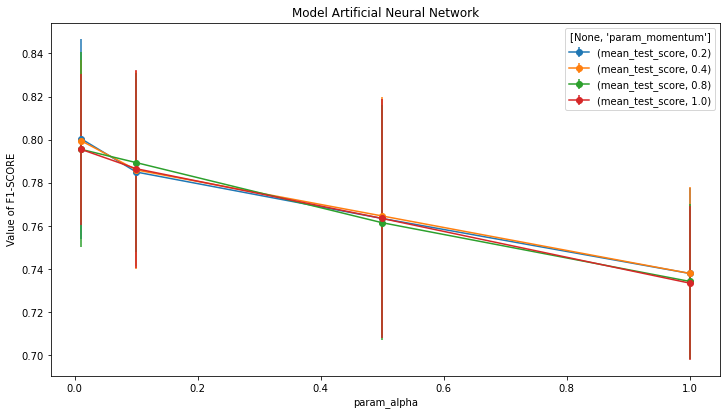

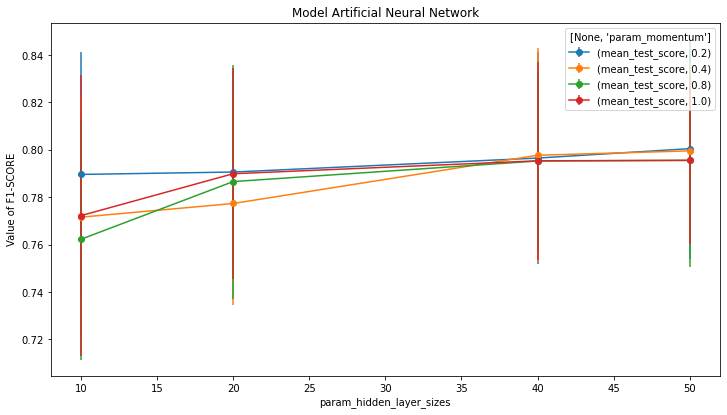

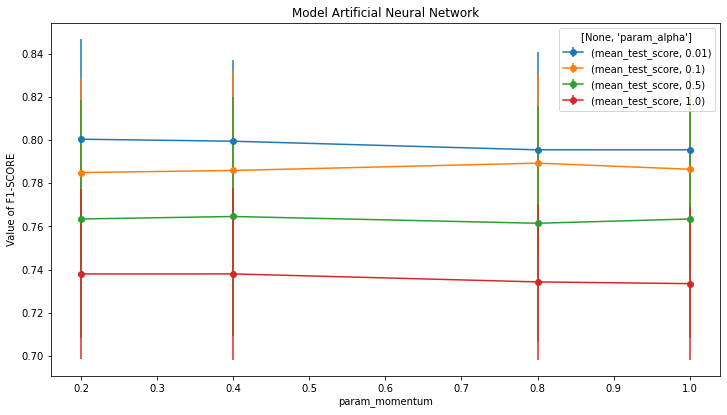

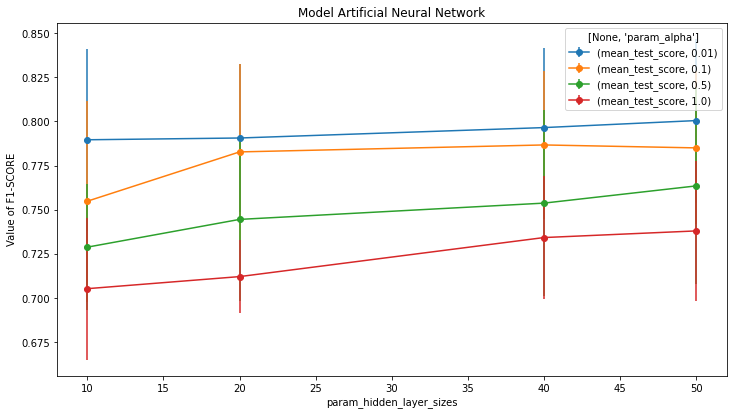

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6.5
#Plotting Optimasi Sistem
#1
def plot_results(index='alpha', columns='hidden_layer_sizes'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Artificial Neural Network')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='alpha') 
plot_results(index='momentum') 
#2
def plot_results(index='alpha', columns='momentum'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Artificial Neural Network')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='alpha') 
plot_results(index='hidden_layer_sizes') 
#3
def plot_results(index='alpha', columns='alpha'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Artificial Neural Network')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='momentum') 
plot_results(index='hidden_layer_sizes') 

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


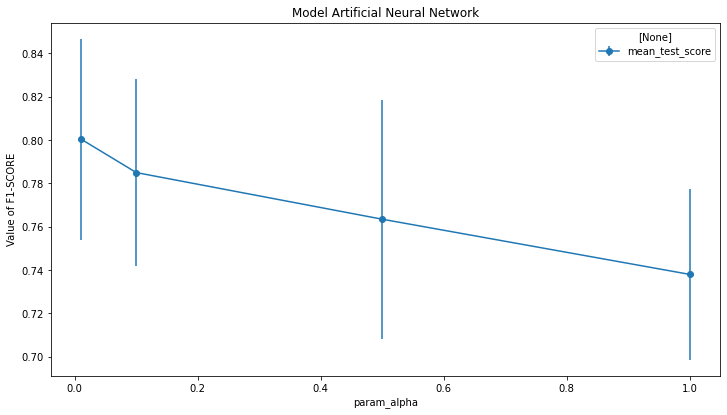

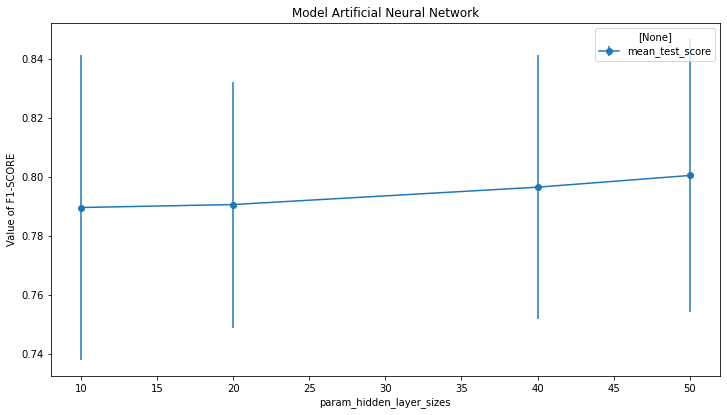

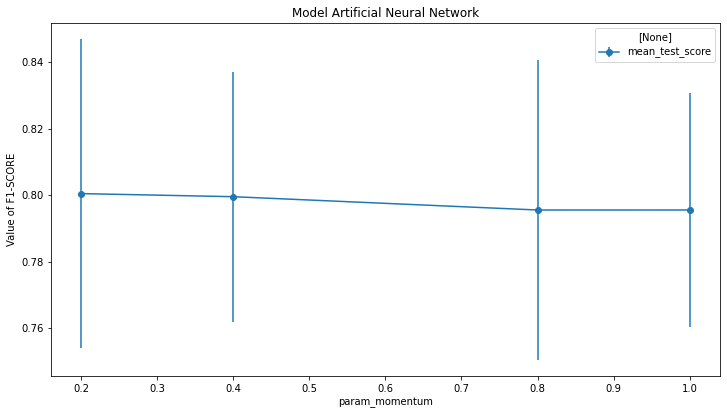

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6.5
#1
def plot_results(index='', columns=''):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    
    df = pd.DataFrame(clf.cv_results_)

    
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    
    table_mean = df.pivot_table(index=index,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index,
                               values=['std_test_score'])

    
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Artificial Neural Network')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='alpha')
plot_results(index='hidden_layer_sizes')
plot_results(index='momentum')

In [26]:
df = pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score']]
df.sort_values('rank_test_score', ascending = True)

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_test_score,std_test_score,params,rank_test_score
12,0.800449,0.046407,"{'alpha': 0.01, 'hidden_layer_sizes': 50, 'momentum': 0.2}",1
13,0.799518,0.037565,"{'alpha': 0.01, 'hidden_layer_sizes': 50, 'momentum': 0.4}",2
9,0.797667,0.045183,"{'alpha': 0.01, 'hidden_layer_sizes': 40, 'momentum': 0.4}",3
8,0.796482,0.044789,"{'alpha': 0.01, 'hidden_layer_sizes': 40, 'momentum': 0.2}",4
15,0.795523,0.035096,"{'alpha': 0.01, 'hidden_layer_sizes': 50, 'momentum': 1}",5
...,...,...,...,...
54,0.710222,0.024698,"{'alpha': 1, 'hidden_layer_sizes': 20, 'momentum': 0.8}",60
48,0.705283,0.040292,"{'alpha': 1, 'hidden_layer_sizes': 10, 'momentum': 0.2}",61
51,0.701167,0.024895,"{'alpha': 1, 'hidden_layer_sizes': 10, 'momentum': 1}",62
50,0.696635,0.021269,"{'alpha': 1, 'hidden_layer_sizes': 10, 'momentum': 0.8}",63


**Algoritma Support Vector Machine**

In [63]:
#Build Tuning Parameter Algorithm
from sklearn.svm import SVC
svm = SVC()

parameter_space = {'C': [0.1, 1, 10, 20],
			'gamma': [10, 1, 0.1, 0.01],
			'kernel': ['rbf','poly','linear']
    }

#optimasi parameter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from pactools import simulate_pac
from pactools.grid_search import ExtractDriver, AddDriverDelay
from pactools.grid_search import DARSklearn, MultipleArray
from pactools.grid_search import GridSearchCVProgressBar

score = make_scorer(f1_score, greater_is_better=True,average='weighted')
clf = GridSearchCVProgressBar(svm, parameter_space, n_jobs=-1, cv=10,scoring = score)
clf.fit(df_tfidf,datasentiment)
print(clf.best_params_)
print(clf.best_score_)



C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8078977778187972


C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


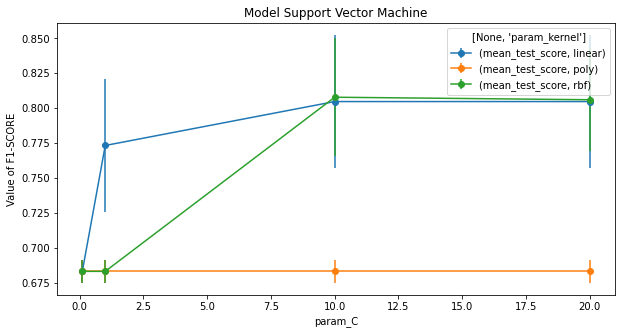

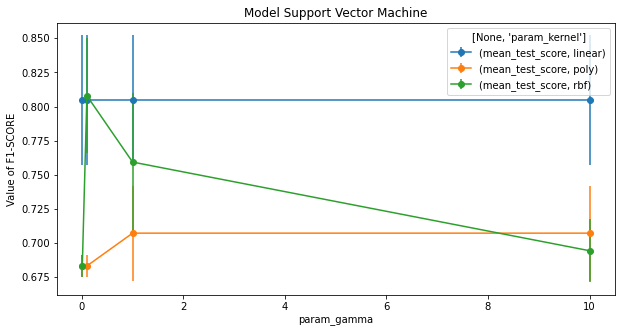

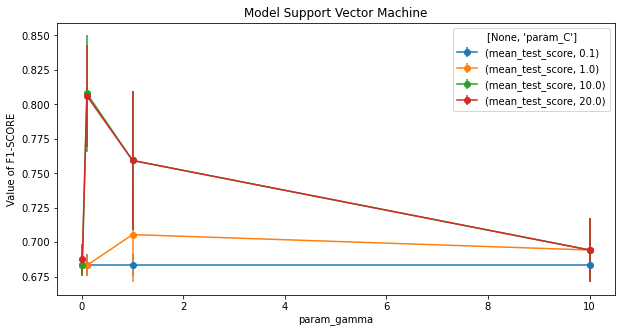

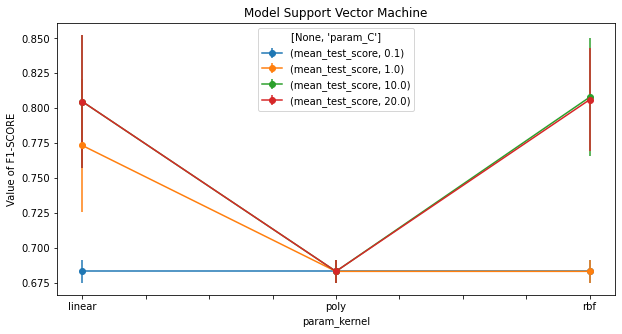

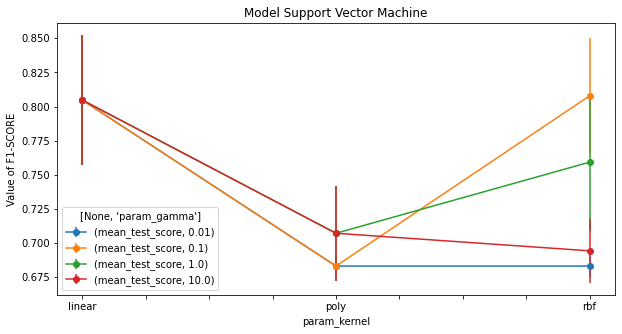

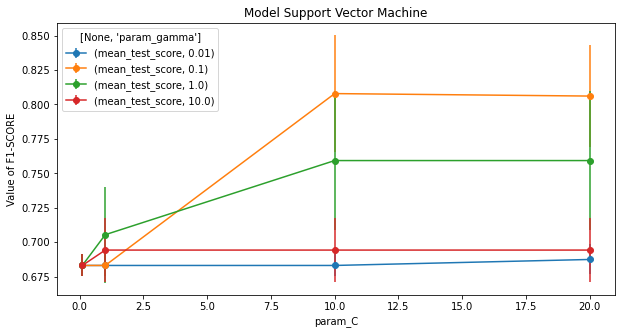

In [64]:
#Plotting Optimasi Sistem
def plot_results(index='', columns='kernel'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    
    df = pd.DataFrame(clf.cv_results_)

    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

  
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

  
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Support Vector Machine')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='C') 
plot_results(index='gamma') 
#2
def plot_results(index='', columns='C'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Support Vector Machine')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='gamma') 
plot_results(index='kernel') 
#3
def plot_results(index='', columns='gamma'):
    """Select two hyperparameters from which we plot the fluctuations"""
    index = 'param_' + index
    columns = 'param_' + columns

    # prepare the results into a pandas.DataFrame
    df = pd.DataFrame(clf.cv_results_)

    # Remove the other by selecting their best values (from gscv.best_params_)
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    other.remove(columns)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    # Create pivot tables for easy plotting
    table_mean = df.pivot_table(index=index, columns=columns,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index, columns=columns,
                               values=['std_test_score'])

    # plot the pivot tables
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Support Vector Machine')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='kernel') 
plot_results(index='C') 

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


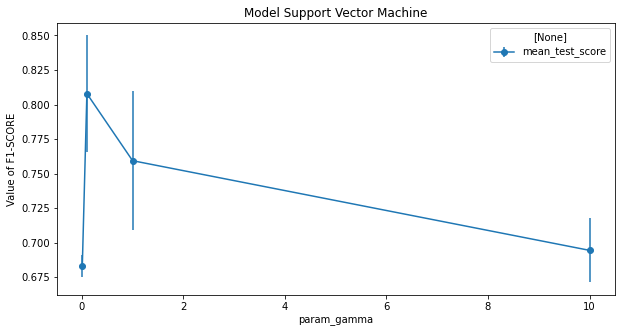

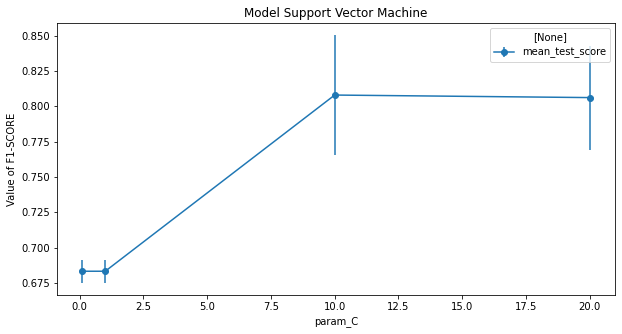

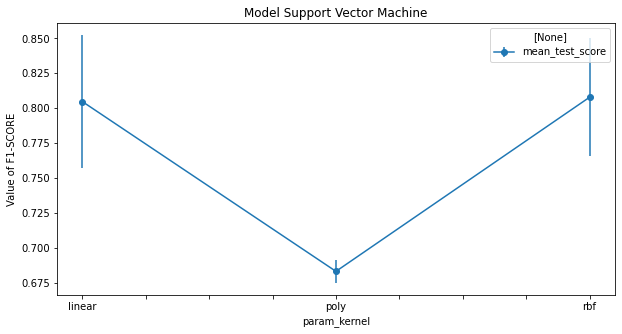

In [65]:
def plot_results(index='', columns=''):
    
    index = 'param_' + index
    columns = 'param_' + columns

    
    df = pd.DataFrame(clf.cv_results_)

    
    other = [c for c in df.columns if c[:6] == 'param_']
    other.remove(index)
    for col in other:
          df = df[df[col] == clf.best_params_[col[6:]]]

    table_mean = df.pivot_table(index=index,
                                values=['mean_test_score'])
    table_std = df.pivot_table(index=index,
                               values=['std_test_score'])

    
    plt.figure()
    ax = plt.gca()
    for col_mean, col_std in zip(table_mean.columns, table_std.columns):
        table_mean[col_mean].plot(ax=ax, yerr=table_std[col_std], marker='o',
                                  label=col_mean)
    plt.title('Model Support Vector Machine')
    plt.ylabel('Value of F1-SCORE')
    plt.legend(title=table_mean.columns.names)
    plt.show()


plot_results(index='gamma')
plot_results(index='C')
plot_results(index='kernel')

In [66]:
df = pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score']]
df.sort_values('rank_test_score', ascending = True)

C:\Users\win 8\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_test_score,std_test_score,params,rank_test_score
30,0.807898,0.042173,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",1
42,0.806105,0.036745,"{'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}",2
47,0.804795,0.047325,"{'C': 20, 'gamma': 0.01, 'kernel': 'linear'}",3
44,0.804795,0.047325,"{'C': 20, 'gamma': 0.1, 'kernel': 'linear'}",3
41,0.804795,0.047325,"{'C': 20, 'gamma': 1, 'kernel': 'linear'}",3
38,0.804795,0.047325,"{'C': 20, 'gamma': 10, 'kernel': 'linear'}",3
35,0.804795,0.047325,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",3
32,0.804795,0.047325,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",3
29,0.804795,0.047325,"{'C': 10, 'gamma': 1, 'kernel': 'linear'}",3
26,0.804795,0.047325,"{'C': 10, 'gamma': 10, 'kernel': 'linear'}",3
